In [2]:
import pandas as pd
import numpy as np

In [3]:
Data=pd.read_excel("Data_train.xlsx")

In [5]:
Data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# EDA

In [6]:
Data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

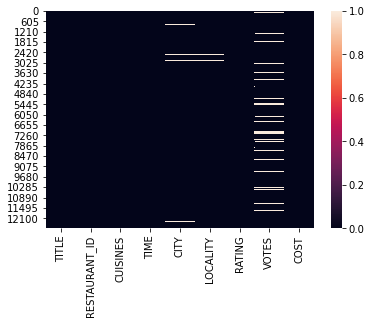

In [9]:
sns.heatmap(Data.isnull())

In [10]:
# we have null values in city and votes where both are different data types so we need to change them

In [11]:
Data['CITY'].mode()

0    Chennai
dtype: object

In [12]:
Data['VOTES'].mode()
Data['LOCALITY'].mode()
Data['RATING'].mode()

0    3.9
dtype: object

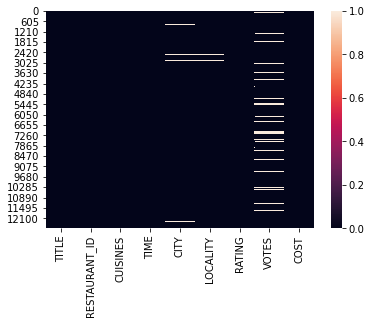

In [13]:
sns.heatmap(Data.isnull())

In [14]:
Data['CITY']=Data['CITY'].replace(np.NaN,'Chennai')

In [15]:
Data['VOTES']=Data['VOTES'].replace(np.NaN,'44 votes')

In [16]:
Data['LOCALITY']=Data['LOCALITY'].replace(np.NaN,'Gachibowli')

In [17]:
Data['RATING']=Data['RATING'].replace(np.NaN,'3.9')

In [18]:
Data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

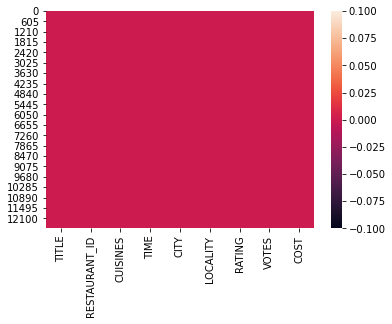

In [19]:
sns.heatmap(Data.isnull())

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
items=['TITLE','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES']
for i in items:
    Data[i]=le.fit_transform(Data[i])

In [21]:
# here the data is encoded for Better EDA
Data.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,9438,2627,739,320,285,17,1278,1200
1,33,13198,289,1885,67,1046,23,950,1500
2,31,10915,2976,661,67,1101,19,712,800
3,95,6346,4130,275,222,136,22,787,800
4,50,15387,1766,615,222,620,19,470,300
5,31,5618,3113,1137,222,1360,21,1356,800
6,22,4383,792,1073,37,575,22,1301,600
7,82,1249,416,1528,119,1153,24,451,1600
8,95,7062,3924,2020,37,142,20,10,300
9,95,10109,2850,627,131,282,14,702,200


In [22]:

#Droping Id Columns
Data=Data.drop(['RESTAURANT_ID'],axis=1)

In [23]:
Data.dtypes

TITLE       int32
CUISINES    int32
TIME        int32
CITY        int32
LOCALITY    int32
RATING      int32
VOTES       int32
COST        int64
dtype: object

In [24]:
Data.describe()
# All values have more max value than 75% so outliers re present 
# Std is more in all than Rating 

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,142.281403,652.391568,18.795902,991.443578,655.252246
std,32.762427,1204.091664,754.459944,83.921428,399.116379,6.181352,482.531198,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,16.000000,619.000000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,582.000000,19.000000,1100.000000,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1009.000000,22.000000,1341.000000,800.000000
max,112.000000,4154.000000,2688.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


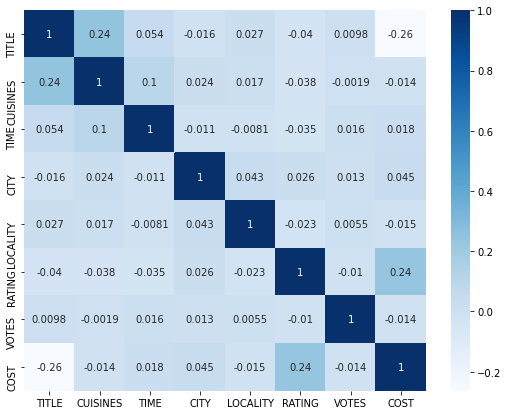

In [25]:
plt.figure(figsize=(9,7))
sns.heatmap(Data.corr(),cmap='Blues',annot=True)
# from this map it is clear tht cusines is the only coulum that is corelated with cost 
# Rating is _vely co related 

(array([   0,    1,    2, ..., 4152, 4153, 4154]),
 <a list of 4155 Text major ticklabel objects>)

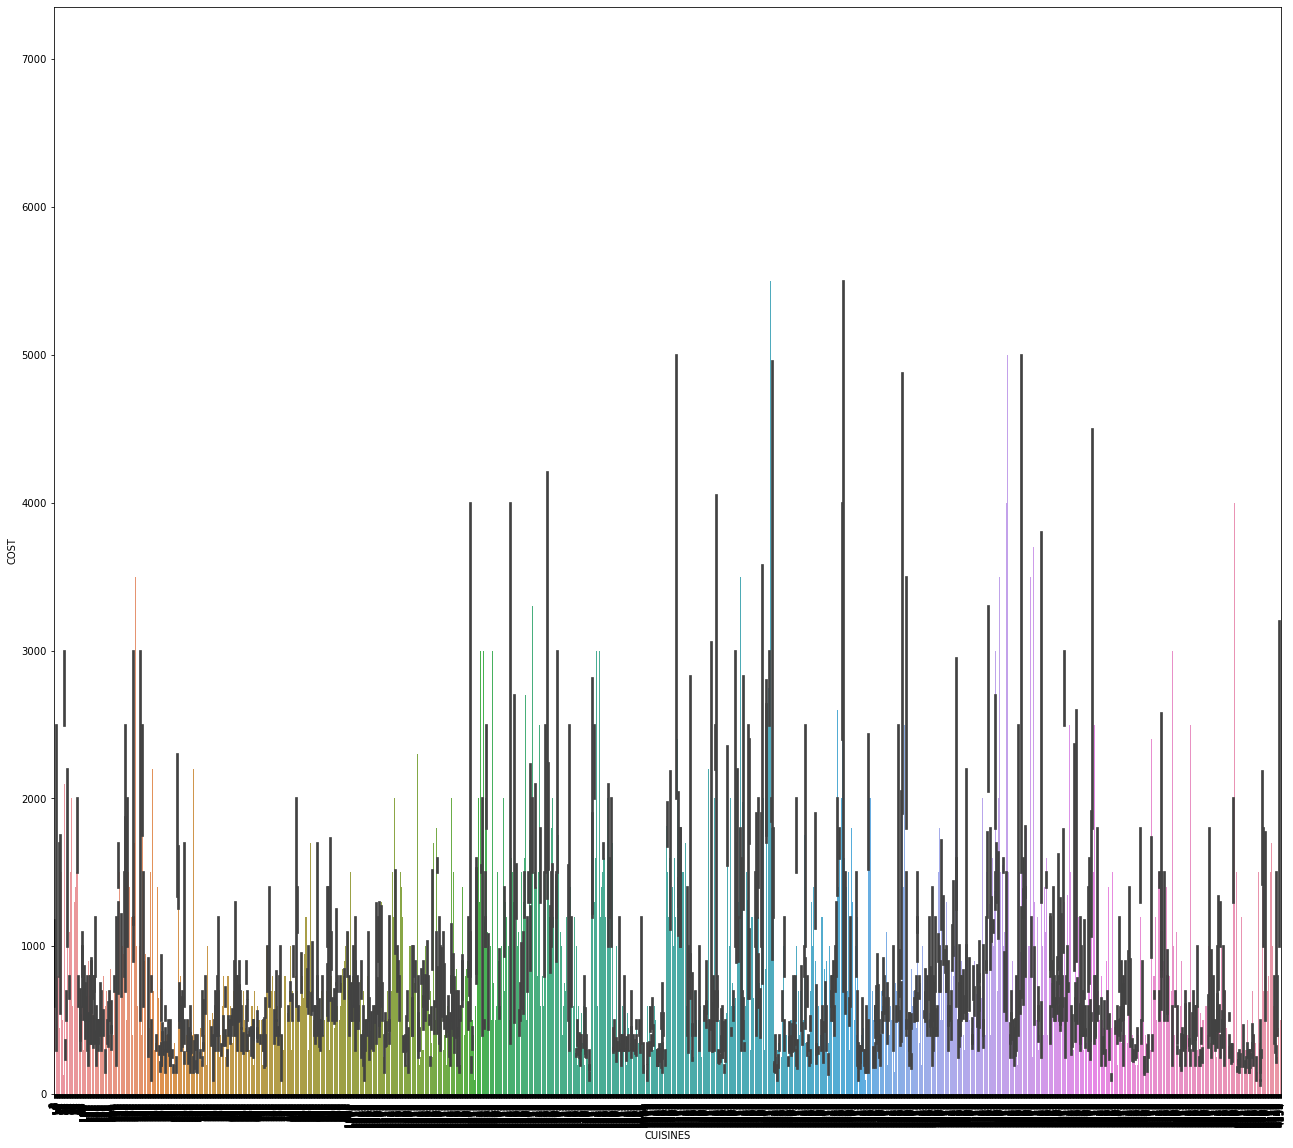

In [26]:
plt.figure(figsize=(22,20))
sns.barplot(x='CUISINES',y='COST',data=Data)
plt.xticks(rotation='vertical')

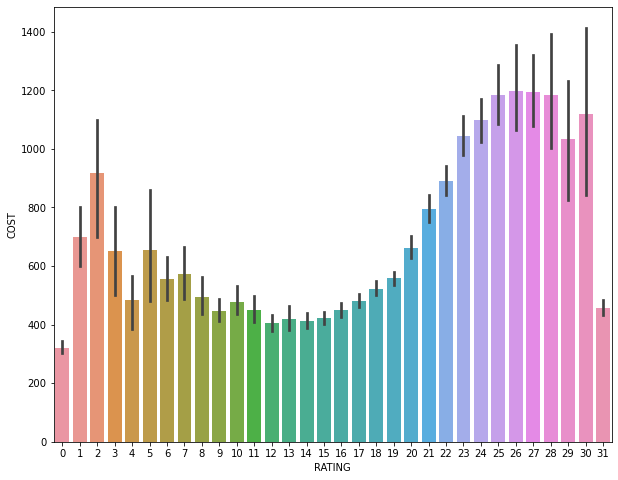

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x='RATING',y='COST',data=Data)
# rating 26 has the hiighest cost and rating 0 has the least 

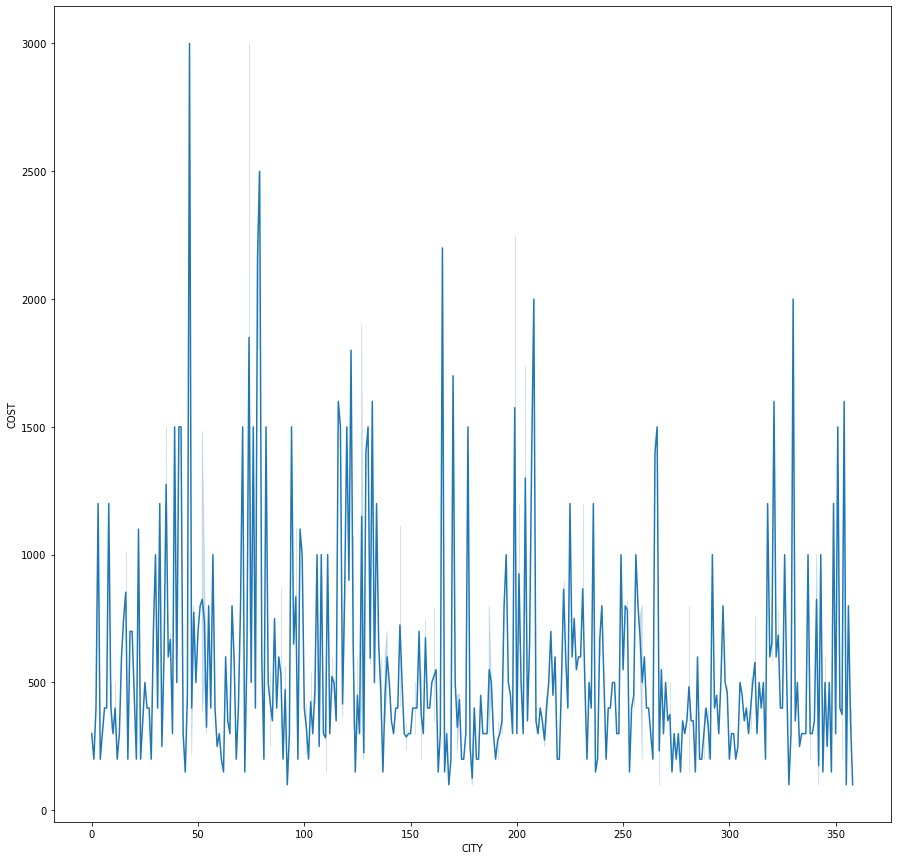

In [28]:
plt.figure(figsize=(15,15))
sns.lineplot(x="CITY",y='COST',data=Data)
# 47th city has the highest cost where as 170 has the lowest sales

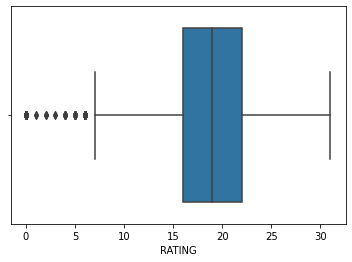

In [29]:
sns.boxplot("RATING",data=Data)
# there are outliers present in the data so we need to remove them 

In [30]:
# outliers are removed using zscore
from scipy.stats import zscore
z_score=abs(zscore(Data))
print(Data.shape)
data=Data.loc[(z_score<3).all(axis=1)]
print(data.shape)

(12690, 8)
(11972, 8)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F71D012E0>,
      dtype=object)

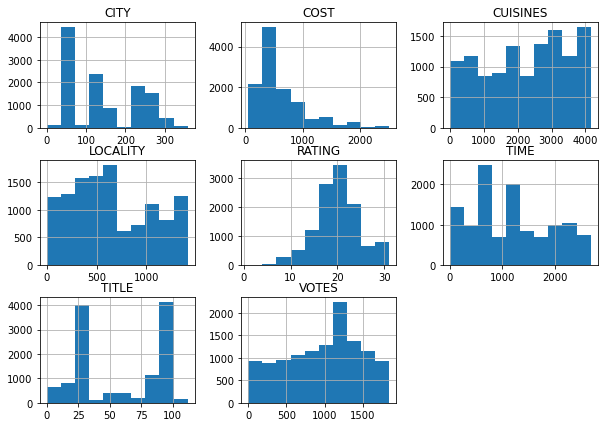

In [31]:
data.hist(figsize=(10,7))

In [54]:
data.skew()
# here the data is skewed perfectly so no need to change 

TITLE      -0.071799
CUISINES   -0.216128
TIME        0.342022
CITY        0.306613
LOCALITY    0.344343
RATING      0.143057
VOTES      -0.263713
COST        1.737557
dtype: float64

In [32]:
# We need to scale the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Food=sc.fit_transform(data)

In [33]:
Food

array([[-0.87232945,  0.32552   , -0.5624589 , ..., -0.50050044,
         0.60392623,  1.28507821],
       [-0.81151332, -1.6092568 ,  0.9720453 , ...,  0.69961798,
        -0.0650073 ,  1.94137803],
       [-0.87232945,  0.61432971, -0.66690159, ..., -0.10046096,
        -0.550392  ,  0.41001178],
       ...,
       [ 0.34399313, -0.12052136, -0.02953336, ...,  0.29957851,
         0.90984095,  1.50384482],
       [-0.87232945,  1.05292325,  0.90777288, ..., -0.70052017,
         0.02880654, -0.46505464],
       [-0.87232945,  0.58950366, -0.43391404, ..., -0.90053991,
         1.06687718, -0.02752143]])

In [34]:
data_new=pd.DataFrame(Food,columns=data.columns)

In [35]:
# now the data is been scaled 
data_new

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,-0.872329,0.325520,-0.562459,2.100234,-0.917653,-0.500500,0.603926,1.285078
1,-0.811513,-1.609257,0.972045,-0.869811,0.988827,0.699618,-0.065007,1.941378
2,-0.872329,0.614330,-0.666902,-0.869811,1.126615,-0.100461,-0.550392,0.410012
3,1.073787,1.569305,-1.183759,0.949782,-1.290933,0.499598,-0.397435,0.410012
4,-0.294576,-0.386988,-0.728496,0.949782,-0.078401,-0.100461,-1.043934,-0.683821
...,...,...,...,...,...,...,...,...
11967,1.073787,0.579573,-0.020160,-0.118495,-0.774855,-0.100461,0.748726,-0.246288
11968,-0.811513,-0.075007,0.024027,0.949782,-1.298448,0.899638,-1.612936,2.597678
11969,0.343993,-0.120521,-0.029533,1.149350,1.730376,0.299579,0.909841,1.503845
11970,-0.872329,1.052923,0.907773,-0.869811,-0.050843,-0.700520,0.028807,-0.465055


In [36]:
# splitting the data
x=data_new.drop(['COST'],axis=1)
y=data_new[['COST']]

In [37]:
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,-0.872329,0.325520,-0.562459,2.100234,-0.917653,-0.500500,0.603926
1,-0.811513,-1.609257,0.972045,-0.869811,0.988827,0.699618,-0.065007
2,-0.872329,0.614330,-0.666902,-0.869811,1.126615,-0.100461,-0.550392
3,1.073787,1.569305,-1.183759,0.949782,-1.290933,0.499598,-0.397435
4,-0.294576,-0.386988,-0.728496,0.949782,-0.078401,-0.100461,-1.043934
...,...,...,...,...,...,...,...
11967,1.073787,0.579573,-0.020160,-0.118495,-0.774855,-0.100461,0.748726
11968,-0.811513,-0.075007,0.024027,0.949782,-1.298448,0.899638,-1.612936
11969,0.343993,-0.120521,-0.029533,1.149350,1.730376,0.299579,0.909841
11970,-0.872329,1.052923,0.907773,-0.869811,-0.050843,-0.700520,0.028807


In [38]:
y

,COST
0,1.285078
1,1.941378
2,0.410012
3,0.410012
4,-0.683821
...,...
11967,-0.246288
11968,2.597678
11969,1.503845
11970,-0.465055


In [39]:
# now the data is ready for training and testing the data 
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [41]:
lg=LinearRegression()
kn=KNeighborsRegressor()
gr=GradientBoostingRegressor()
ar=AdaBoostRegressor()
dtr=DecisionTreeRegressor()
sv=SVR()
rfr=RandomForestRegressor()

In [42]:
models=[]
models.append(('Linear ',lg))
models.append(('Support vector Regressor',sv))
models.append(('Decision tree Regressor',dtr))
models.append(('Gradient boosting Regressor ',gr))
models.append(('AdaBoost Regressor',ar))
models.append(('K neighbors regressor',kn))
models.append(('Random Forest regressor',rfr))

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def maxr2_score(lg,x,y):
    max_r_score=0
    for r_state in range(0,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        lg.fit(x_train,y_train)
        y_pred=lg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print(" r2 score coressponding o ",r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        print("max r2 score coresspondnig to ",final_r_state,'is',max_r_score)
        return final_r_state

In [45]:

lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

 r2 score coressponding o  0 is 0.18612155993561508
max r2 score coresspondnig to  0 is 0.18612155993561508


In [46]:
pred=lreg.predict(x_test)
lreg.score(x_train,y_train)

0.1894639625254737

In [47]:
kn=KNeighborsRegressor()
r_state=maxr2_score(kn,x,y)

 r2 score coressponding o  0 is 0.34616531597649536
max r2 score coresspondnig to  0 is 0.34616531597649536


In [48]:
pred=kn.predict(x_test)
kn.score(x_train,y_train)

0.5645742873362312

In [49]:
gr=GradientBoostingRegressor()
r_state=maxr2_score(gr,x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 r2 score coressponding o  0 is 0.6746442157170145
max r2 score coresspondnig to  0 is 0.6746442157170145


In [50]:
pred=gr.predict(x_test)
gr.score(x_train,y_train)

0.6968136409330792

In [51]:
ar=AdaBoostRegressor()
r_state=maxr2_score(ar,x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


 r2 score coressponding o  0 is 0.31887093502238073
max r2 score coresspondnig to  0 is 0.31887093502238073


In [52]:
pred=ar.predict(x_test)
ar.score(x_train,y_train)

0.32169144876037925

In [53]:
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

 r2 score coressponding o  0 is 0.405232185237405
max r2 score coresspondnig to  0 is 0.405232185237405


In [54]:
pred=dtr.predict(x_test)
dtr.score(x_train,y_train)

0.9999993743865323

In [55]:
# from the above it is clear that we are getting 99% accuracy in decision tree regressor so we need to import the model no need of grid serch cv becasue it is already at a high accuracy model 

In [56]:
# now checking the cross validation score for the best  model
print(" Mean r2 score for Decison treee regressor  is ",cross_val_score(dtr,x,y,cv=5,scoring='r2').mean())

 Mean r2 score for Decison treee regressor  is  0.40497277018832917


In [57]:
import joblib

In [58]:
joblib.dump(dtr,"FOOD_COST.obj")

['FOOD_COST.obj']